In [ ]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [ ]:
# lendo a base de dados
imoveis= pd.read_csv(r'C:/Users/AdelaideAlvesdeOlive/OneDrive - SD&W/1-Material/IAeML/AssociaçãoCorrelação/Arquivo_Valorizacao_Ambiental.csv', sep=';')


In [ ]:
# visualizando alguns dados
imoveis.head()

In [ ]:
# visualizando formatos das variáveis
imoveis.info()

In [ ]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(imoveis.isnull().sum(),imoveis.isnull().sum()/len(imoveis)), columns=['Count', 'Proportion'], index=imoveis.columns)


In [ ]:
# descritivo das variáveis: medidas resumo
imoveis.describe().round(2) 


In [ ]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar

plt.hist(imoveis['Valor'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Valor')



In [ ]:
# avaliando a distribuicaoo de cada variavel numérica 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis['Valor'].hist(bins=20)
fig.set_xlabel('Valor ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 2)
fig = imoveis['AV100m'].hist(bins=20)
fig.set_xlabel('AV100m')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 3)
fig = imoveis['IA'].hist(bins=20)
fig.set_xlabel('IA')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 4)
fig = imoveis['Andar'].hist(bins=20)
fig.set_xlabel('Andar')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 5)
fig = imoveis['Suites'].hist(bins=20)
fig.set_xlabel('Suites')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 6)
fig = imoveis['DistBM'].hist(bins=20)
fig.set_xlabel('DistBM')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 7)
fig = imoveis['Semruido'].hist(bins=20)
fig.set_xlabel('Semruido ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 8)
fig = imoveis['Area'].hist(bins=20)
fig.set_xlabel('Area ')
fig.set_ylabel('Número de casos')


In [ ]:
# Outra opção para variáveis quantitativas Boxplot: para visualizar Outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em 100R$')


plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em M2')


plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('IA')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('DistBM')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Suites')




In [ ]:
# Importante nessa etapa é avaliar se tem alguma variável com presença de outliers ou daados extremos
# Antes de ir para a correlação avaliar o que fazer!!!!!!!!!!!corrigir, eliminar....

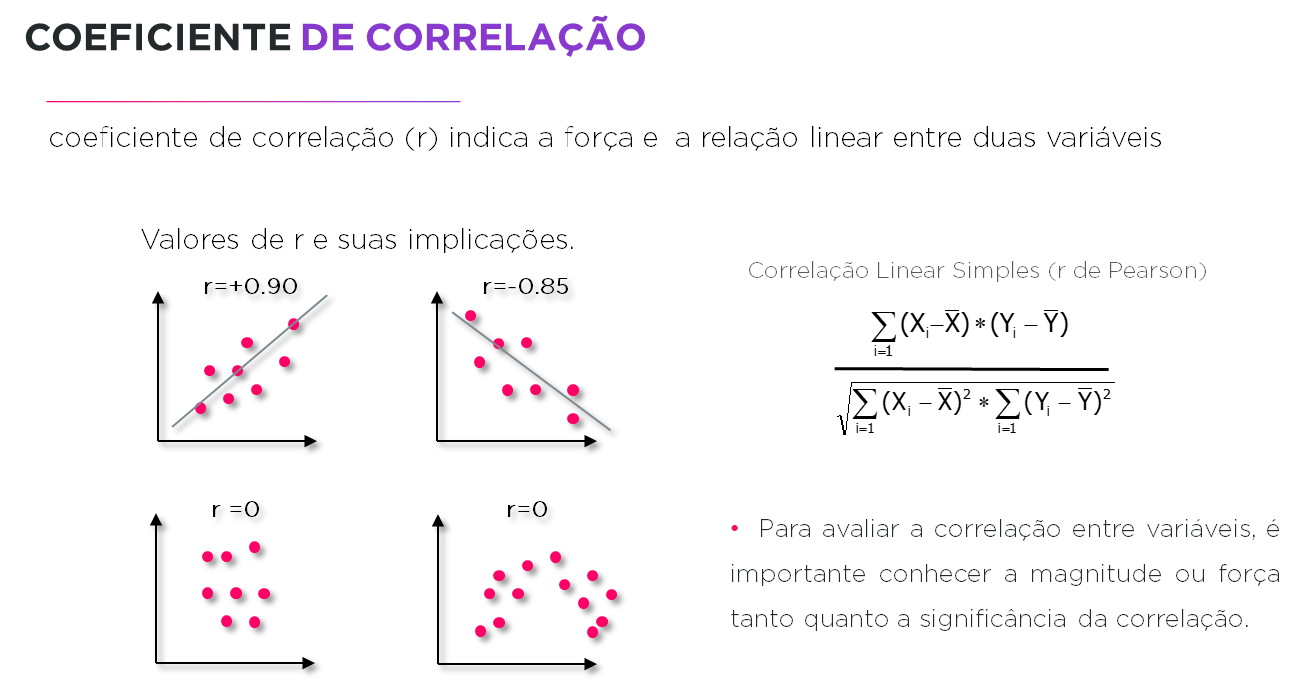

In [ ]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

imoveis.corr().round(2)

In [ ]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
corr = imoveis.corr(method='pearson')
corr

In [ ]:
correlation = imoveis.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [ ]:
# Em uma análise descritiva sempre utilizar a variável Target - De acordo com o objetivo
# gráfico quando a variável preditora quantitativa 

# Gráfico de dispersão ou scatterplot
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel("Area em m2")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Area em m2")

In [ ]:
# Variáveis Preditoras/Independentes quantitativas com a variável Target


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)

plt.scatter(imoveis['Area'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Area')

plt.subplot(4, 2, 2)

plt.scatter(imoveis['IA'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('IA')


plt.subplot(4, 2, 3)

plt.scatter(imoveis['DistBM'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('DistBM')


plt.subplot(4, 2, 4)

plt.scatter(imoveis['Suites'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Suites')


In [ ]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Valor versus a variável Vista
sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls');

In [ ]:
# Boxplot da variável Valor versus a variável Semruido
sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

In [ ]:
# Boxplot da variável Valor versus a variável AV100m
sb.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')

In [ ]:
# Teste qui-quadrado é utilizado para descobrir associação entre duas variáveis qualitativas
# transformar a variável Valor do Imovel em qualitativa --> faixa valor (qualitativa ordinal) vs Semruido(qualitativa ordinal)
# criar a faixa_vlr você usar os quartis 

In [ ]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo 
#minimo = min.(df['total'])   
Q1 =  np.percentile(imoveis['Valor'], 25)
Q2 =  np.percentile(imoveis['Valor'], 50)
Q3 =  np.percentile(imoveis['Valor'], 75)
maximo = max(imoveis['Valor'])    
print(Q1, Q2, Q3, maximo)


In [ ]:
imoveis.loc[(imoveis.Valor >= 0) & (imoveis.Valor <= Q1), 'fx_total']=1.0
imoveis.loc[(imoveis.Valor > Q1) & (imoveis.Valor <= Q2), 'fx_total']=2.0
imoveis.loc[(imoveis.Valor>  Q2)  & (imoveis.Valor <=Q3), 'fx_total']=3.0
imoveis.loc[(imoveis.Valor >  Q3) & (imoveis.Valor <= maximo), 'fx_total']=4.0

In [ ]:
imoveis.info()

In [ ]:
# crosstab tabela cruzada entre duas variáveis qualitativas

pd.crosstab(imoveis.fx_total,imoveis.Semruido, margins=True)

In [ ]:
# Uma variável sem_ruído
(imoveis.Semruido.value_counts() / imoveis.shape[0]) * 100

In [ ]:
table = pd.crosstab(imoveis.fx_total,imoveis.Semruido)

In [ ]:
print(table)

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:

stat, p, dof, expected = chi2_contingency(table)
p


####   Teste de hipótese:
    H0: não há relação entre valor e ruído
    H1: há relação entre valor e ruído
    α = 0,05 (5%)

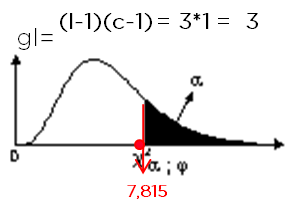

In [ ]:
print('Graus de liberdade: dof=%d' % dof)

print('\n Tabela Esperada:')
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('\n probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('\n significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')

In [ ]:
!pip install researchpy
import researchpy

In [ ]:
results1 = researchpy.crosstab(imoveis['fx_total'],imoveis['Semruido'], test='chi-square')

In [ ]:
results1

In [ ]:
results2 = researchpy.crosstab(imoveis['fx_total'],imoveis['Vista'], test='chi-square')

In [ ]:
results2

In [ ]:
results3 = researchpy.crosstab(imoveis['fx_total'],imoveis['AV100m'], test='chi-square')

In [ ]:
results3

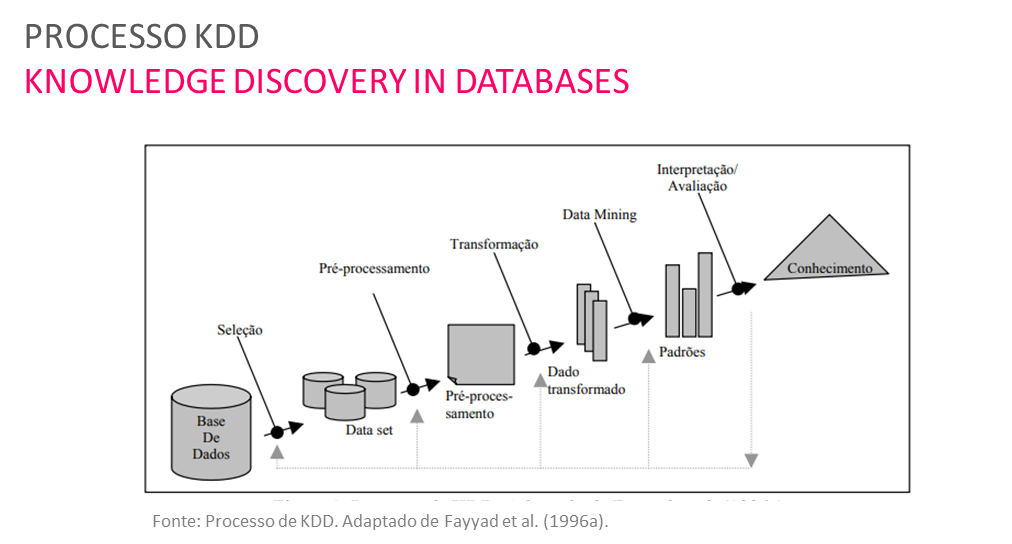

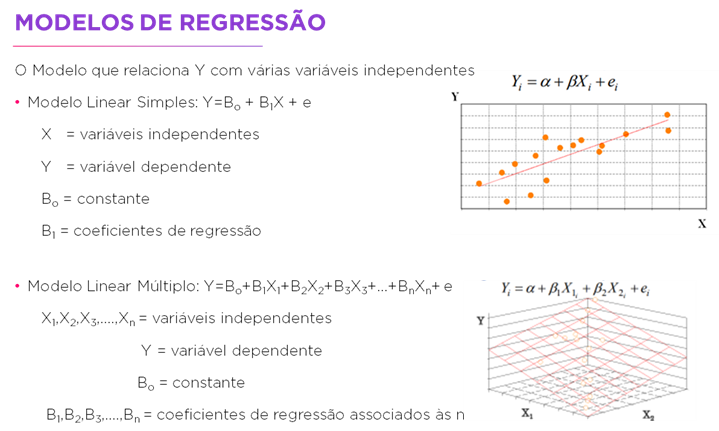

In [ ]:
# Regressão linear múltipla
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [ ]:
# Ajustar a Regressão Linear  
# lm =linear model

X = imoveis[['Area','Suites', 'IA', 'Semruido', 'Vista', 'Andar','AV100m']]

y = imoveis[['Valor']]



In [ ]:
# fit é a função de estimação 
lm.fit(X,y)


In [ ]:
# Intercepto do modelo (b0)

print(lm.intercept_)

print(lm.coef_)

In [ ]:
# Os coeficientes do modelo (b1,b2,b3....)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients

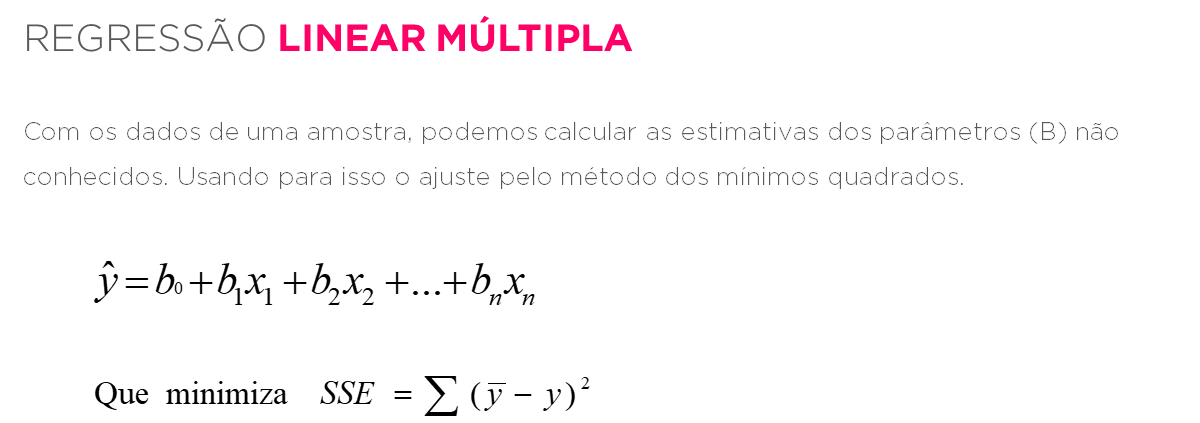

In [ ]:
# Utilizando o sklearn
# Selecionar todas as variáveis preditoras no modelo
# Selecionar as variáveis preditoras e a resposta

# EXEMPLO:
# newdf = df[df.columns[2:4]]  # Remember, Python is 0-offset! The "3rd" entry is at slot 2.


In [ ]:
imoveis.info()

In [ ]:

X = imoveis[imoveis.columns[2:10]]

y = imoveis['Valor']

In [ ]:
from sklearn.model_selection import train_test_split

# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 101)

In [ ]:
# importar bibliotecas
import statsmodels.api as sm
from scipy import stats

In [ ]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares

X_ = sm.add_constant(X_train)

model = sm.OLS(y_train, X_).fit()

print(model.summary())




In [ ]:
# Voltando na base
imoveis.info()

In [ ]:
# Secionando as variáveis significantes
X_train, X_test, y_train, y_test = train_test_split(imoveis.drop(['Valor','Ordem', 'DistBM', 'AV100m'],axis=1),imoveis['Valor'],test_size=0.05, random_state=17)



In [ ]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares

X_ = sm.add_constant(X_train)

modelo = sm.OLS(y_train, X_).fit()

print(modelo.summary())


    Na saída da regressãolinear as medidas mais importantes para nós neste momento são o R2 ajustado, a estatística de teste F, o p-valor dessa estatística e, caso queiramos comparar diferentes modelos, o log-likelihood, o Akaike Information Criterion (AIC) e o Bayesian Information Criterion (BIC).
    
    A avaliação da qualidade de ajuste da reta de regressão que é obtida atráves de Soma de Quadrados de Resíduos (SQR) e R2 RQuadrado). Também, pode-se usar a estatística F que é usado para testar se pelo menos uma variável preditora possui um coeficiente diferente de zero.
    
    Coeficiente de Determinação (R2)
    O coeficiente de determinação ou R2, mede a proporção de variabilidade total em Y que pode ser explicada pela reta de regressão linear com as variáveis preditoras, e assume sempre valores de 0 e 1. Se R2 é proximo de 1, indica que uma grande proporção da variabilidade na resposta foi explicada pela regressão e ´quando R2 é próximo de 0 indica que a regressão não explicou grande parte da variabilidade na resposta.

       Neste estudo, R2= 0.805, 81% da variação total do valor do imóvel é explicada pela equação de regressão estimada tendo as variáveis explicativas acima.

In [ ]:
# Importar a biblioteca
# Medidas de erro 

# Utilizado quando vamos comparar vários modelos

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Calculando o valor predito da variável resposta na amostra treino  
y_train_pred = modelo.predict(X_)


In [ ]:
y_train_pred

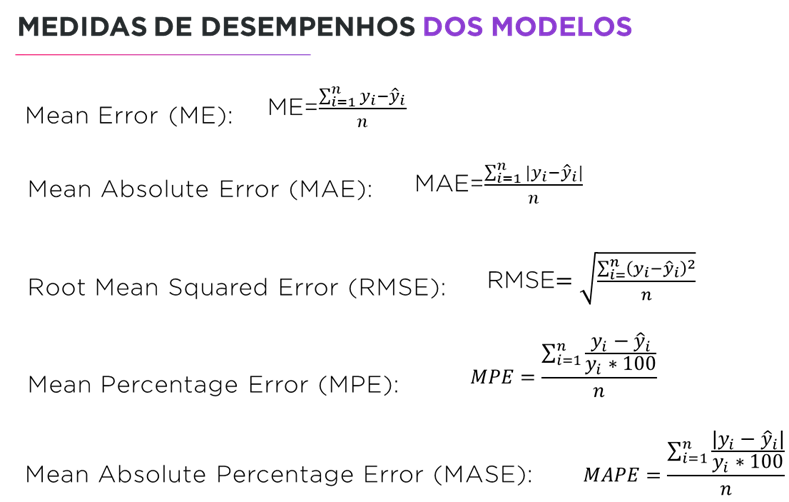

In [ ]:
# Medidas de erro na amostra treino 
me1   = round((y_train-y_train_pred).mean(),2)
mae1  = (mean_absolute_error(y_train, y_train_pred)).round(2)
mse1  = (mean_squared_error(y_train, y_train_pred)).round(2)
rmse1  = (np.sqrt(mean_squared_error(y_train, y_train_pred))).round(2)
mpe1  = round(((y_train - y_train_pred)/y_train).mean(),2)
mape1  =  round((mae1/y_train).mean(),2) 


In [ ]:
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
 
pd.DataFrame({"treino":list1})

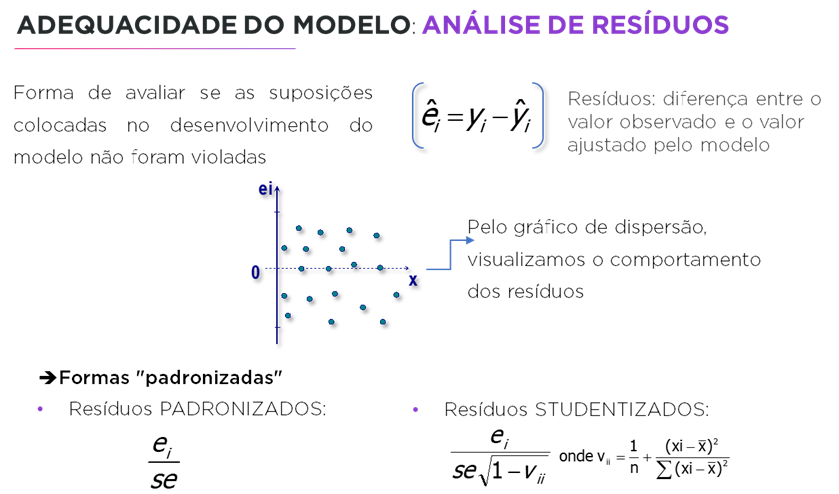

    Gráficos de Diagnóstico dos Resíduos
    
    Residuals vs Fitted - indica a existência de padrões não lineares nos resíduos. Uma das suposições matemáticas na construção de um modelo usando Mínimos Quadrados é que os dados podem ser ajustados por uma linha. Se essa suposição for válida e os dados puderem ser ajustados por um modelo linear, uma linha aproximadamente horizontal sem padrões aparecerá no gráfico.

    Normal Q-Q - examina se os resíduos são normalmente distribuídos. É bom que os pontos residuais sigam a linha reta.

    Homoscedasticidade - verifica a homogeneidade de variância dos resíduos. A linha horizontal com pontos igualmente dispersos é uma boa indicação de homoscedasticidade.

    Residuals vs Leverage - identifica casos influentes, ou seja, valores extremos que podem influenciar os resultados da regressão quando incluídos ou excluídos da análise.

    Antes de se construir os gráficos, em primeiro construir-se-á o modelo de resíduo para cada diagnóstico.

In [ ]:
# Construção de diagnóstico para os gráficos
modelo_ajust_y = modelo.fittedvalues # Valores do modelo ajustados
modelo_residuos = modelo.resid # Residuos
modelo_norm_resid = modelo.get_influence().resid_studentized_internal # Residuos normalizados
modelo_norm_resid_abs = np.sqrt(np.abs(modelo_norm_resid)) # Quadrados dos residuos normalizados
modelo_outliers = modelo.get_influence().hat_matrix_diag # Outliers
distancia_cook = modelo.get_influence().cooks_distance[0] # Distancia de Cook

In [ ]:
modelo_ajust_y

In [ ]:
modelo_norm_resid 

In [ ]:
# um dataframe com a variável observado e estimado pelo modelo 

dataframe = pd.concat([y_train, modelo_ajust_y], axis=1)

In [ ]:
dataframe

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_train_pred ,y_train, marker='.')
plt.xlabel("Observado")
plt.ylabel("Estimado")


In [ ]:
### Teste de Linearidade
### Nestes gráficos a presença de um padrão nos resíduos pode indicar um problema com algum aspecto do modelo linear.


plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(modelo_ajust_y, dataframe.columns[-0], data=dataframe,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
                          
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [ ]:
### Teste de Normalidade
### O gráfico de resíduos pode ser usado para verificar visualmente a suposição de normalidade.
### Sendo que para que se aceite que os resíduos estão normalmente distribuidos deve seguir aproximadamente uma linha reta.    
    
sm.qqplot(modelo_norm_resid, line='45')


    Teste de normalidade dos resíduos Shapiro-Wilk Test Teste de hipótese:

    H0: Distribuição = Normal H1: Distribuição <> Normal

    Erro de decisâo: 0,05 ou 5%

    Critério de decisâo: 
        Se p-value < erro de decisão então rejeito H0.
        Se p-value >= erro de decisão então não rejeito H0

In [ ]:
shapiro_test = stats.shapiro(modelo_norm_resid)
shapiro_test
#(statistic, p-value)

    Qual a sua conclusão?
    

In [ ]:
### Teste de Homoscedasticidade
### O gráfico Scale-Location mostra os resíduos que são distribuídos igualmente ao longo dos intervalos de preditores.
### Uma linha horizontal com pontos igualmente dispersos, é bom.

plot_lm_3 = plt.figure()
plt.scatter(modelo_ajust_y, modelo_norm_resid_abs, alpha=0.5);
sb.regplot(modelo_ajust_y, modelo_norm_resid_abs,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_xlim(4, max(modelo_ajust_y)+0.05)

In [ ]:
### Pontos influentes e valores extremos

### o gráfico de dispersão pode nos mostrar quais observações não correspondem ao modelo ajustado. 
### Outliers:

### para uma melhor detecção de outliers em Y, diversas formas “padronizadas” foram propostas.
### Para Resíduos Normalizados, se os erros têm distribuição normal, então aproximadamente 95% dos resíduos normalizado (di)
### devem estar no intervalo de (-2,2). 
#### Note que, resíduos fora desse intervalo podem indicar a presença de outliers.

plot_lm_4 = plt.figure();
plt.scatter(modelo_outliers, modelo_norm_resid, alpha=0.5);
sb.regplot(modelo_outliers, modelo_norm_resid,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(modelo_outliers)+0.01)

In [ ]:
plot_lm_4 = plt.figure();
plt.scatter(modelo_outliers, modelo_norm_resid, alpha=0.5);
sb.regplot(modelo_outliers, modelo_norm_resid,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(modelo_outliers)+0.01);
plot_lm_4.axes[0].set_ylim(-3, 3)

In [ ]:
plot_lm_4 = plt.figure();
plt.scatter(modelo_outliers, modelo_norm_resid, alpha=0.5);
sb.regplot(modelo_outliers, modelo_norm_resid,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(distancia_cook), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(modelo_outliers[i],
                                     modelo_norm_resid[i]))

In [ ]:
### O gráfico (Residual vs Leverage) mostra os três principais pontos mais extremos (120 e 47), e 6 com resíduos padronizados acima de −2.
### No entanto, há discrepantes pontos que excedam 3 desvios padrão, 47 e 120.

In [ ]:
# #### Quando a analise de residuos revela que o modelo utilizado nao se ajusta aos dados de maneira satisfatoria, 
# #### existem estrategias que podem ser utilizadas para melhorar o ajuste:
#. Transformacao de variaveis: Aplicar alguma funcao em Y, como logaritmo ou raiz quadrada.
#. Adicao de termo quadrático: X^2
#. Adicao de interacao entre variaveis: X1*X2
#. Escolha de outro tipo de modelo linear: polinomial, segmentado, de efeitos aleatorios
#. Outra escolha eh trabalhar com Regressoes Penalizadas(Ridge e Lasso)
#. Escolha de outro tipo de modelo nao necessariamente linear: GLMs, modelos nao-lineares
#. Escolha de outros algoritmos como Árvore de Regressão, SVM, KNN, Modelos Esemble, Redes Neurais

